In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("/Users/ShantanuOjha/Downloads/dogs-vs-cats"))

['model2nd.h5', '.DS_Store', 'sampleSubmission.csv', '11th sep.ipynb', 'test1', 'Desktop', '10th sep.ipynb', 'test1.zip', 'train', 'model.h5', 'model1st.h5', '.ipynb_checkpoints', 'train.zip']


In [3]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)       

In [5]:
model.load_weights("/Users/ShantanuOjha/Downloads/dogs-vs-cats/model2st.h5")

In [6]:
test_filenames = os.listdir("/Users/ShantanuOjha/Downloads/dogs-vs-cats/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [8]:
batch_size=15

In [9]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/Users/ShantanuOjha/Downloads/dogs-vs-cats/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [11]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [12]:
test_df['category'] = np.argmax(predict, axis=-1)

In [17]:
filenames = os.listdir("/Users/ShantanuOjha/Downloads/dogs-vs-cats/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [19]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25001 entries, 0 to 25000
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  25001 non-null  object
 1   category  25001 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


<AxesSubplot:>

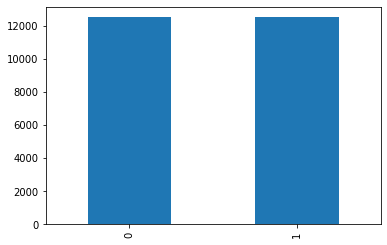

In [20]:
df['category'].value_counts().plot.bar()

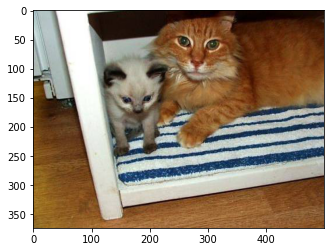

In [21]:
sample = random.choice(df.filename)
image = load_img("/Users/ShantanuOjha/Downloads/dogs-vs-cats/train/"+sample)
plt.imshow(image)



In [22]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [23]:
df.head()

,filename,category
0,dog.8011.jpg,dog
1,"cat5,471.jpg",cat
2,dog.7322.jpg,dog
3,"cat4,662.jpg",cat
4,"cat7,979.jpg",cat


In [24]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [25]:
train_df

,filename,category
0,cat711.jpg,cat
1,dog.5865.jpg,dog
2,"cat1,105.jpg",cat
3,"cat8,453.jpg",cat
4,"cat6,761.jpg",cat
...,...,...
19995,"cat12,417.jpg",cat
19996,dog.1622.jpg,dog
19997,"cat2,020.jpg",cat
19998,cat602.jpg,cat


In [26]:
validate_df

,filename,category
0,"cat3,047.jpg",cat
1,"cat4,939.jpg",cat
2,"cat11,784.jpg",cat
3,dog.5364.jpg,dog
4,"cat11,211.jpg",cat
...,...,...
4996,"cat11,803.jpg",cat
4997,dog.1813.jpg,dog
4998,"cat7,487.jpg",cat
4999,dog.4011.jpg,dog


In [28]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]


In [29]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/Users/ShantanuOjha/Downloads/dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 19999 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.8/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [30]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/Users/ShantanuOjha/Downloads/dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5001 validated image filenames belonging to 2 classes.


In [31]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/Users/ShantanuOjha/Downloads/dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


In [33]:
example_df

,filename,category
0,"cat12,023.jpg",cat


In [34]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

<AxesSubplot:>

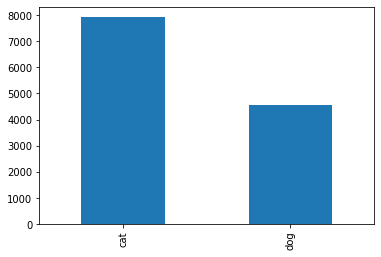

In [35]:
test_df['category'].value_counts().plot.bar()

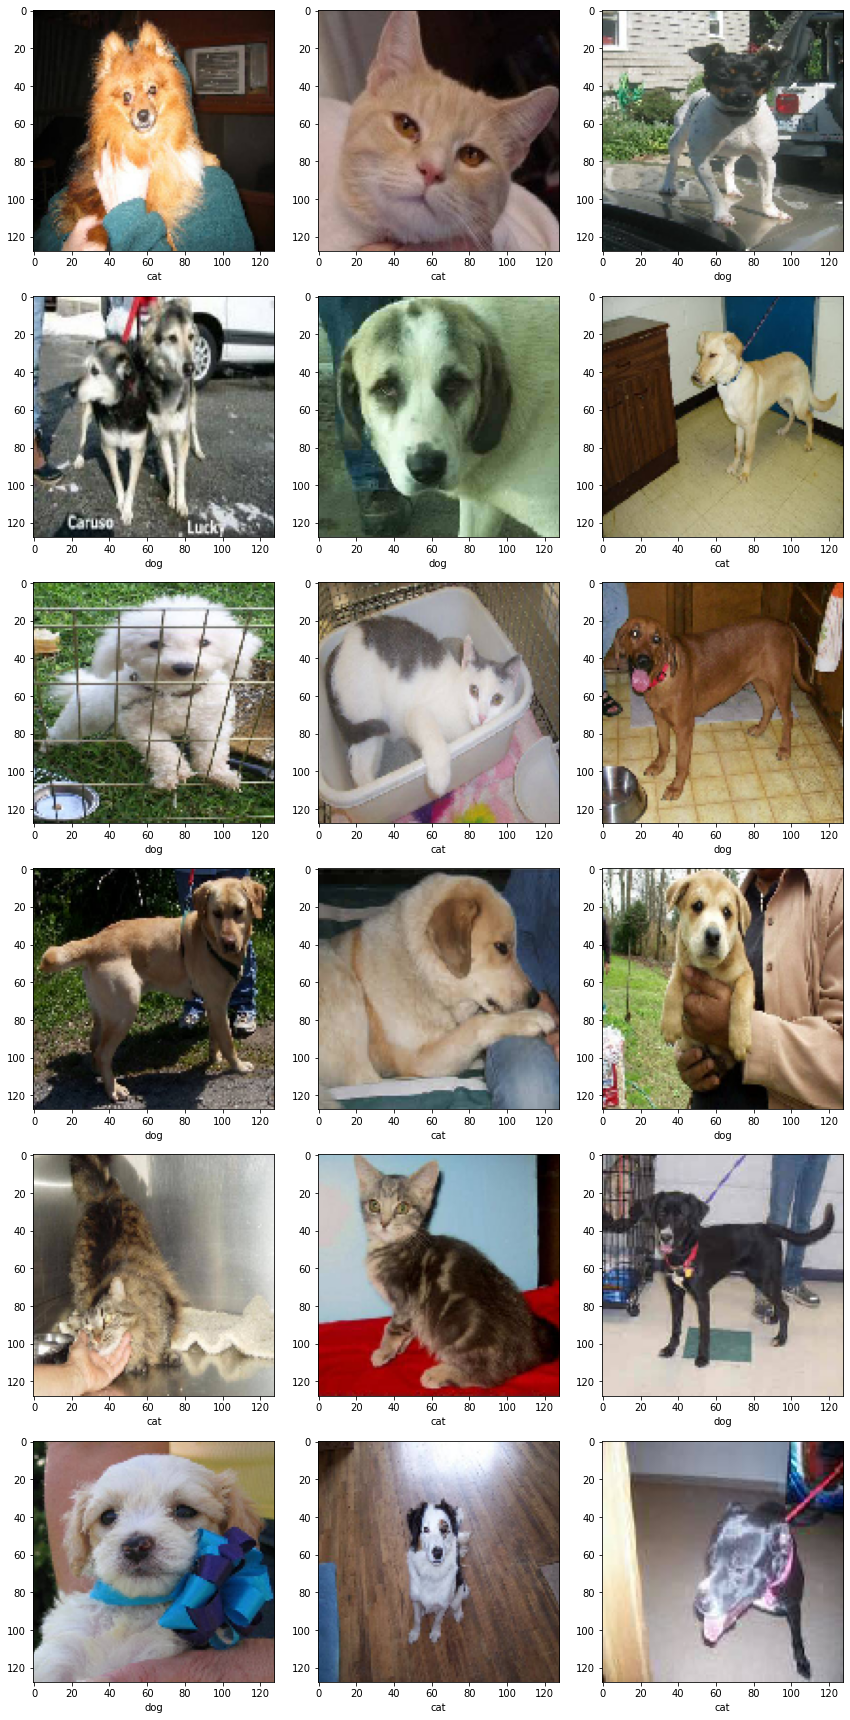

In [37]:
sample_test = test_df[30:48]
sample_test.head()
plt.figure(figsize=(12, 24))
output=1
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/Users/ShantanuOjha/Downloads/dogs-vs-cats/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, output)
    output=output+1
    plt.imshow(img)
    plt.xlabel("{}".format(category) )
plt.tight_layout()
plt.show()